In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
ThisDir = "C3d_ThreePointIntSync" #CHANGE THIS BY HAND!!!

OrdParamDir  = "{}_r".format(ThisDir)

PlotDir  = "{}_Plots".format(ThisDir)

In [3]:
K1_List = np.linspace(-2.0, 2.0, 21)
K2_List = np.linspace(0.0, 2.0, 21)

In [4]:
ic_omega = 0
ic_theta_start, ic_theta_stop = 0, 8

In [5]:
# kk1_start, kk1_stop = 0, 10
# #--------------------------------------------------
# fig = plt.figure()
# ax = fig.add_axes([0, 0, 1, 1])
# #-------------------------
# MyColors1 = plt.cm.jet( np.linspace(0, 1, len(range(kk1_start, kk1_stop))) )
# #-------------------------
# for ii, kk1 in enumerate(range(kk1_start, kk1_stop)):
#     K1 = K1_List[kk1]
    
#     r3_K2sweep_df = pd.DataFrame()
    
#     for ic_theta in range(ic_theta_start, ic_theta_stop+1):
#         r3_K2sweep = []
#         for kk2, K2 in enumerate(K2_List):
#         #for kk2, K2 in enumerate(K2_List[:kk2_stop]):
#             r3_FileName = f"{OrdParamDir}/{ThisDir}_r_data_omega{ic_omega}_theta{ic_theta}_K2_{kk2}.csv"
#             r3_df = pd.read_csv(r3_FileName)
#             r3_K2sweep.append(r3_df["TimeAvg"][kk1])
#         r3_K2sweep_df[f"theta{ic_theta}"] = r3_K2sweep
    
#     ax.errorbar(K2_List, r3_K2sweep_df.mean(axis=1), r3_K2sweep_df.std(axis=1), c=MyColors1[ii],
#                 fmt='o-', fillstyle="none", capsize=5, alpha=1, label=f"{K1:.1f}")
# #-------------------------
# ax.set(xlim=[-0.1, 2.1], ylim=[-0.01, 1.01])

# ax.set_ylabel("Order Parameter, r", fontsize=15)
# ax.set_xlabel(r"2-simplex coupling, $K_{2}$", fontsize=15)
# ax.set_title(f"Number of ICs={ic_theta_stop-ic_theta_start+1}", fontsize=15)


# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles[::-1], labels[::-1], title=f"$K_1$", fontsize=12,
#           loc='lower left', bbox_to_anchor=(1.02, 0.1))
# ax.grid(True)
# #-------------------------
# FigName = f"{PlotDir}/{ThisDir}_r_vs_K2_omega{ic_omega}_theta{ic_theta_start}to{ic_theta_stop}_p1.png"
# plt.savefig(FigName, format="png", transparent=False, bbox_inches="tight", pad_inches=0.1)
# #-------------------------
# plt.show()

In [6]:
K2_List_ForArea = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
HystArea_List = [0.04073147483305388, 0.2226550757582884, 0.3735763118224039, 0.6366287089552014, 0.9152258091477901, 1.10345259843844, 1.3320928135040249, 1.5270708498796195, 1.6814086276905085]

In [7]:
p3_coeff = np.polyfit(K2_List_ForArea, HystArea_List, 3)
p3 = np.poly1d(p3_coeff)

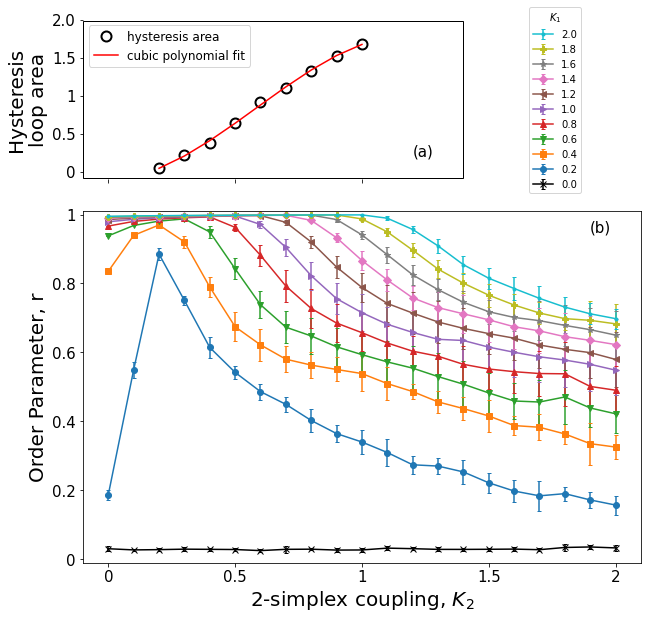

In [102]:
kk1_start, kk1_stop = 10, 21
#--------------------------------------------------
fig = plt.figure(constrained_layout=False, figsize=(10,10))
# gs = fig.add_gridspec(nrows=3, ncols=2, left=0., right=0., wspace=0.0)
gs = fig.add_gridspec(nrows=3, ncols=2)#, bottom=0)#, left=0.05, right=0.48, wspace=0.05)

ax1 = fig.add_subplot(gs[:1, :])
ax2 = fig.add_subplot(gs[1:, :])
#-------------------------
# MyColors2 = plt.cm.jet( np.linspace(0, 1, len(range(kk1_start, kk1_stop))) )
# MyColors2 = plt.cm.tab20( np.linspace(0, 1, len(range(kk1_start, kk1_stop))) )
MyColors2 = plt.cm.tab20( np.linspace(0, 1, len(range(kk1_start, kk1_stop))) )

#-------------------------
ax1.plot(K2_List_ForArea, HystArea_List, marker="o", fillstyle="none", ls="", mew=2, color="black", ms=10, label="hysteresis area")
ax1.plot(K2_List_ForArea, p3(K2_List_ForArea), "-", color="red", label="cubic polynomial fit")

ax1.set(xlim=[-0.1, 2.1], ylim=[-0.1, 2.01])

# Remove axis, but keep ticks:
for key, spine in ax1.spines.items():
    spine.set_visible(False)

# Custom add axis: 
rect = patches.Rectangle((-0.1, -0.09), 1.5, 2.08, linewidth=1, edgecolor='k', facecolor='none')
ax1.add_patch(rect)

# x- and y-ticks
ax1.set_xticks([0, 0.5, 1])
ax1.set_xticklabels([])

ax1.set_yticks([0, 0.5, 1, 1.5, 2.0])
ax1.set_yticklabels([0, 0.5, 1, 1.5, 2.0], fontsize=15)
#---
ax1.set_ylabel("Hysteresis\nloop area", fontsize=20)

ax1.text(1.2, 0.2, "(a)", fontsize=15)

ax1.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0, 1))
#-------------------------
MarkerType_list = ["x-", "o-", "s-", "v-", "^-", ">-",
                   "<-", "D-", "*-", "P-", ".-"]
for ii, kk1 in enumerate(range(kk1_start, kk1_stop)):
    K1 = K1_List[kk1]
    
    r3_K2sweep_df = pd.DataFrame()
    
    for ic_theta in range(ic_theta_start, ic_theta_stop+1):
        r3_K2sweep = []
        for kk2, K2 in enumerate(K2_List):
            r3_FileName = f"{OrdParamDir}/{ThisDir}_r_data_omega{ic_omega}_theta{ic_theta}_K2_{kk2}.csv"
            r3_df = pd.read_csv(r3_FileName)
            r3_K2sweep.append(r3_df["TimeAvg"][kk1])
        r3_K2sweep_df[f"theta{ic_theta}"] = r3_K2sweep
    
    ax2.errorbar(K2_List, r3_K2sweep_df.mean(axis=1), r3_K2sweep_df.std(axis=1), c=a[ii],# MyColors2[ii],
                fmt=MarkerType_list[ii], fillstyle="full", capsize=2, alpha=1, label=f"{K1:.1f}")
#-------------------------
ax2.text(1.9, 0.95, "(b)", fontsize=15)
#-------------------------
ax2.set(xlim=[-0.1, 2.1], ylim=[-0.01, 1.01])

ax2.set_xticks([0, 0.5, 1, 1.5, 2])
ax2.set_xticklabels([0, 0.5, 1, 1.5, 2], fontsize=15)

ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=15)
#-------------------------
ax2.set_ylabel("Order Parameter, r", fontsize=20)
ax2.set_xlabel(r"2-simplex coupling, $K_{2}$", fontsize=20)
# ax.set_title(f"Number of ICs={ic_theta_stop-ic_theta_start+1}", fontsize=15)

handles, labels = ax2.get_legend_handles_labels()
ax2_leg = ax2.legend(handles[::-1], labels[::-1], fontsize=10, loc=(0.8, 1.05))#, bbox_to_anchor=(2, 1))
ax2_leg.set_title(f"$K_1$", prop={'size':10})

# ax.grid(True)
#-------------------------
FigFormat = "pdf"
FigName = f"{PlotDir}/{ThisDir}_r_vs_K2_omega{ic_omega}_theta{ic_theta_start}to{ic_theta_stop}_p2_ForFinalPaper2.{FigFormat}"
plt.savefig(FigName, format=FigFormat, transparent=False, bbox_inches="tight", pad_inches=0.1)
#-------------------------
plt.show()

In [93]:
len(range(kk1_start, kk1_stop))

11

In [103]:
FigName

'C3d_ThreePointIntSync_Plots/C3d_ThreePointIntSync_r_vs_K2_omega0_theta0to8_p2_ForFinalPaper2.pdf'

In [79]:
b = plt.cm.tab20(range(0, 20, 2))

In [80]:
b

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.49803922, 0.49803922, 0.49803922, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [81]:
a = np.zeros((11, 4))

In [82]:
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [85]:
for ii in range(1, 11):
    print(ii)
    a[ii]=b[ii-1]

1
2
3
4
5
6
7
8
9
10


In [86]:
a

array([[0.        , 0.        , 0.        , 0.        ],
       [0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.49803922, 0.49803922, 0.49803922, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [54]:
hello = MyColors2.copy()

In [55]:
hello

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.49803922, 0.49803922, 0.49803922, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.61960784, 0.85490196, 0.89803922, 1.        ]])

In [57]:
hello[:-1,:]

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.49803922, 0.49803922, 0.49803922, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [52]:
hello2 = np.array([[0, 0, 0, 0],
                  ])

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.49803922, 0.49803922, 0.49803922, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [36]:
plt.cm.tab20(range(0, 20, 2)), 

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [1.        , 0.49803922, 0.05490196, 1.        ],
       [0.17254902, 0.62745098, 0.17254902, 1.        ],
       [0.83921569, 0.15294118, 0.15686275, 1.        ],
       [0.58039216, 0.40392157, 0.74117647, 1.        ],
       [0.54901961, 0.3372549 , 0.29411765, 1.        ],
       [0.89019608, 0.46666667, 0.76078431, 1.        ],
       [0.49803922, 0.49803922, 0.49803922, 1.        ],
       [0.7372549 , 0.74117647, 0.13333333, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ]])

In [37]:
np.append( [[1, 1, 1, 1]], plt.cm.tab20(range(0, 20, 2)) )

array([1.        , 1.        , 1.        , 1.        , 0.12156863,
       0.46666667, 0.70588235, 1.        , 1.        , 0.49803922,
       0.05490196, 1.        , 0.17254902, 0.62745098, 0.17254902,
       1.        , 0.83921569, 0.15294118, 0.15686275, 1.        ,
       0.58039216, 0.40392157, 0.74117647, 1.        , 0.54901961,
       0.3372549 , 0.29411765, 1.        , 0.89019608, 0.46666667,
       0.76078431, 1.        , 0.49803922, 0.49803922, 0.49803922,
       1.        , 0.7372549 , 0.74117647, 0.13333333, 1.        ,
       0.09019608, 0.74509804, 0.81176471, 1.        ])

In [31]:
print(np.append([1, 2, 3], [['a', 'b', 'c'], [7, 8, 9]]))

['1' '2' '3' 'a' 'b' 'c' '7' '8' '9']


In [ ]:
kk1_start, kk1_stop = 10, 21
#--------------------------------------------------
fig = plt.figure(constrained_layout=True, figsize=(10,10))
# gs = fig.add_gridspec(nrows=3, ncols=2, left=0., right=0., wspace=0.0)
gs = fig.add_gridspec(nrows=3, ncols=2)#, bottom=0)#, left=0.05, right=0.48, wspace=0.05)

ax1 = fig.add_subplot(gs[:1, :])
ax2 = fig.add_subplot(gs[1:, :])
#-------------------------
MyColors2 = plt.cm.jet( np.linspace(0, 1, len(range(kk1_start, kk1_stop))) )
#-------------------------
ax1.plot(K2_List_ForArea, HystArea_List, marker="x", ls="", mew=2, color="black", ms=10, label="hysteresis area")
ax1.plot(K2_List_ForArea, p3(K2_List_ForArea), "--", color="gray", label="cubic polynomial fit")

ax1.set(xlim=[-0.1, 2.1], ylim=[-0.1, 2.01])

# Remove axis, but keep ticks:
for key, spine in ax1.spines.items():
    spine.set_visible(False)

# Custom add axis: 
rect = patches.Rectangle((-0.1, -0.09), 1.25, 2.08, linewidth=1, edgecolor='k', facecolor='none')
ax1.add_patch(rect)

# x- and y-ticks
ax1.set_xticks([0, 0.5, 1])
ax1.set_xticklabels([])

ax1.set_yticks([0, 0.5, 1, 1.5, 2.0])
ax1.set_yticklabels([0, 0.5, 1, 1.5, 2.0], fontsize=15)
#---
ax1.set_ylabel("Hysteresis\nloop area", fontsize=20)

ax1.text(1.2, 1.7, "(a)", fontsize=15)

ax1.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0, 1))
#-------------------------
for ii, kk1 in enumerate(range(kk1_start, kk1_stop)):
    K1 = K1_List[kk1]
    
    r3_K2sweep_df = pd.DataFrame()
    
    for ic_theta in range(ic_theta_start, ic_theta_stop+1):
        r3_K2sweep = []
        for kk2, K2 in enumerate(K2_List):
            r3_FileName = f"{OrdParamDir}/{ThisDir}_r_data_omega{ic_omega}_theta{ic_theta}_K2_{kk2}.csv"
            r3_df = pd.read_csv(r3_FileName)
            r3_K2sweep.append(r3_df["TimeAvg"][kk1])
        r3_K2sweep_df[f"theta{ic_theta}"] = r3_K2sweep
    
    ax2.errorbar(K2_List, r3_K2sweep_df.mean(axis=1), r3_K2sweep_df.std(axis=1), c=MyColors2[ii],
                fmt='o-', fillstyle="none", capsize=2, alpha=1, label=f"{K1:.1f}")
#-------------------------
ax2.text(2.15, 0.95, "(b)", fontsize=15)
#-------------------------
ax2.set(xlim=[-0.1, 2.1], ylim=[-0.01, 1.01])

ax2.set_xticks([0, 0.5, 1, 1.5, 2])
ax2.set_xticklabels([0, 0.5, 1, 1.5, 2], fontsize=15)

ax2.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=15)
#-------------------------
ax2.set_ylabel("Order Parameter, r", fontsize=20)
ax2.set_xlabel(r"2-simplex coupling, $K_{2}$", fontsize=20)
# ax.set_title(f"Number of ICs={ic_theta_stop-ic_theta_start+1}", fontsize=15)

handles, labels = ax2.get_legend_handles_labels()
ax2_leg = ax2.legend(handles[::-1], labels[::-1], fontsize=15, loc='lower left', bbox_to_anchor=(1.02, 0.1))
ax2_leg.set_title(f"$K_1$", prop={'size':15})

# ax.grid(True)
#-------------------------
FigFormat = "png"
FigName = f"{PlotDir}/{ThisDir}_r_vs_K2_omega{ic_omega}_theta{ic_theta_start}to{ic_theta_stop}_p2_ForFinalPaper.{FigFormat}"
plt.savefig(FigName, format=FigFormat, transparent=False, bbox_inches="tight", pad_inches=0.1)
#-------------------------
plt.show()